# House Prices : Advanced Regression Techniques
- Predict sales prices

## Data Dictonary

### variable

In [726]:
text = open('data_description.txt', mode = 'r').read()
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data Exploration

In [727]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [728]:
train = pd.read_csv('train.csv')
train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [729]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [730]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [731]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [732]:
ds = train.isnull().sum() 
ds[ds>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [733]:
ds.index

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

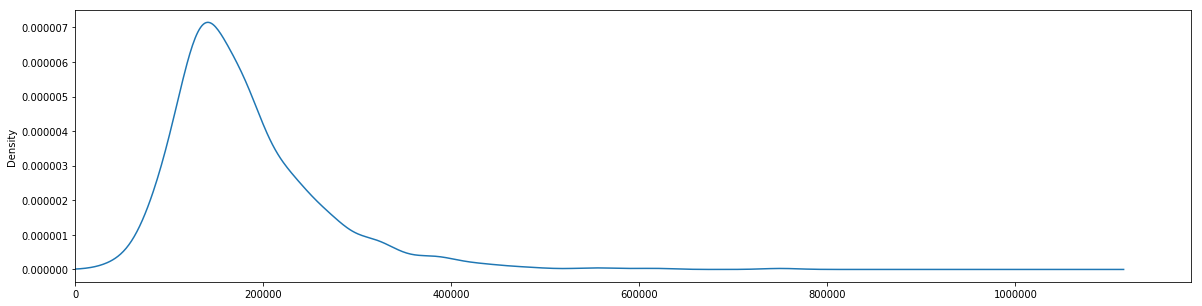

In [734]:
train['SalePrice'].plot(figsize = (20, 5), kind = 'kde', xlim = 0)

In [735]:
def chart_bar(feature):
    ax = train[[feature, 'SalePrice']].groupby(feature).mean().plot(kind = 'bar', figsize = (20,5), title = feature)
    ax.title.set_size(20)
    ax.set_xlabel(feature, fontsize = 20)
    ax.set_ylabel('Price', fontsize = 20)

for i in range(len(train.columns) - 2):
    chart_bar(train.columns[i + 1])

## Feature Engineering

In [736]:
train_test_data = [train, test]

### 1. MSSubClass
Identifies the type of dwelling involved in the sale.

    20	1-STORY 1946 & NEWER ALL STYLES
    30	1-STORY 1945 & OLDER
    40	1-STORY W/FINISHED ATTIC ALL AGES
    45	1-1/2 STORY - UNFINISHED ALL AGES
    50	1-1/2 STORY FINISHED ALL AGES
    60	2-STORY 1946 & NEWER
    70	2-STORY 1945 & OLDER
    75	2-1/2 STORY ALL AGES
    80	SPLIT OR MULTI-LEVEL
    85	SPLIT FOYER
    90	DUPLEX - ALL STYLES AND AGES
    120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150	1-1/2 STORY PUD - ALL AGES
    160	2-STORY PUD - 1946 & NEWER
    190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [772]:
def train_test_info(feature):
    print('Information of {}'.format(feature), '\n')
    for data, a in zip(train_test_data, ['Train', 'Test']):
        print(a)
        print('Number of null : ', data[feature].isnull().sum())
        print('Number of value unique : ', len(data[feature].unique()))
        print('Kind of value unique : ', data[feature].unique())
        print('\n')

In [771]:
test['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [748]:
train_test_info('MSSubClass')

Information of MSSubClass 

Train
Number of null :  0
Number of value unique :  15
Kind of value unique :  [1.         0.77193569 0.69503421 0.59722387 0.54017146 0.45256239
 0.55654057 0.83675905 0.39937622 0.61600718 0.70738742 0.57782141
 0.80199501 0.42634148 0.65066045]


Test
Number of null :  0
Number of value unique :  16
Kind of value unique :  [0.77193569 1.         0.83675905 0.57782141 0.70738742 0.39937622
 0.59722387 0.55654057 0.61600718 0.54017146 0.45256239 0.69503421
 0.80199501 0.42634148 0.65066045 0.64198776]




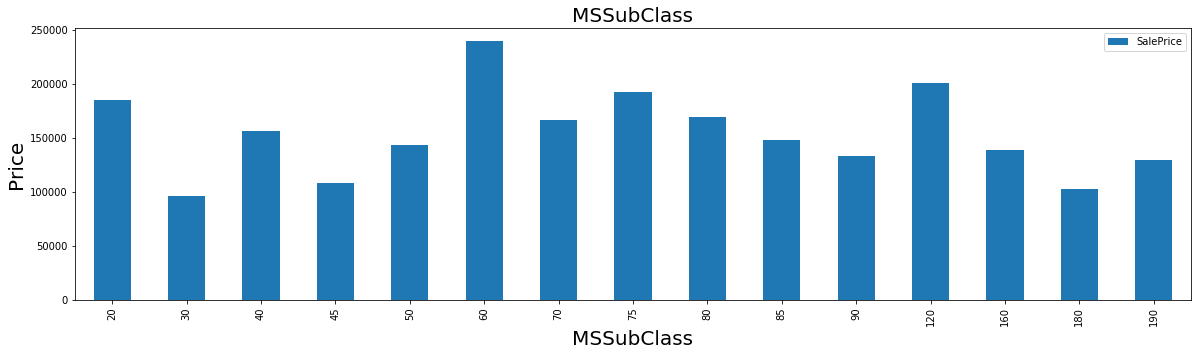

In [739]:
chart_bar('MSSubClass')

In [740]:
def mapping(feature):
    mean_max = train[[feature, 'SalePrice']].groupby(feature).mean().max()[0]
    df_mss = train[[feature, 'SalePrice']].groupby(feature).mean() / mss_mean_max
    feature_mapping = {}
    for key, i in zip(df_mss.index, range(len(df_mss))):
        feature_mapping[key] = df_mss['SalePrice'].iloc[i]
    return feature_mapping

In [741]:
mssubclass_mapping = mapping('MSSubClass')
mssubclass_mapping[150] = sum(list(mssubclass_mapping.values())) / len(mssubclass_mapping.values())
mssubclass_mapping

{20: 0.771935687350835,
 30: 0.39937621602063755,
 40: 0.6506604496879083,
 45: 0.4525623869700098,
 50: 0.5972238677196153,
 60: 1.0,
 70: 0.6950342073586712,
 75: 0.8019950058403,
 80: 0.7073874208057805,
 85: 0.6160071805820319,
 90: 0.5565405742999314,
 120: 0.8367590506317293,
 150: 0.6419877600740628,
 160: 0.5778214074525343,
 180: 0.42634148280591205,
 190: 0.5401714635850466}

In [742]:
for data in train_test_data:
    data['MSSubClass'].replace(mssubclass_mapping, inplace = True)

### 2. MSZoning
Identifies the general zoning classification of the sale.
		
    A	 Agriculture
    C	 Commercial
    FV    Floating Village Residential
    I	 Industrial
    RH	Residential High Density
    RL	Residential Low Density
    RP	Residential Low Density Park 
    RM	Residential Medium Density

In [773]:
train_test_info('MSZoning')

Information of MSZoning 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['RL' 'RM' 'C (all)' 'FV' 'RH']


Test
Number of null :  4
Number of value unique :  6
Kind of value unique :  ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]




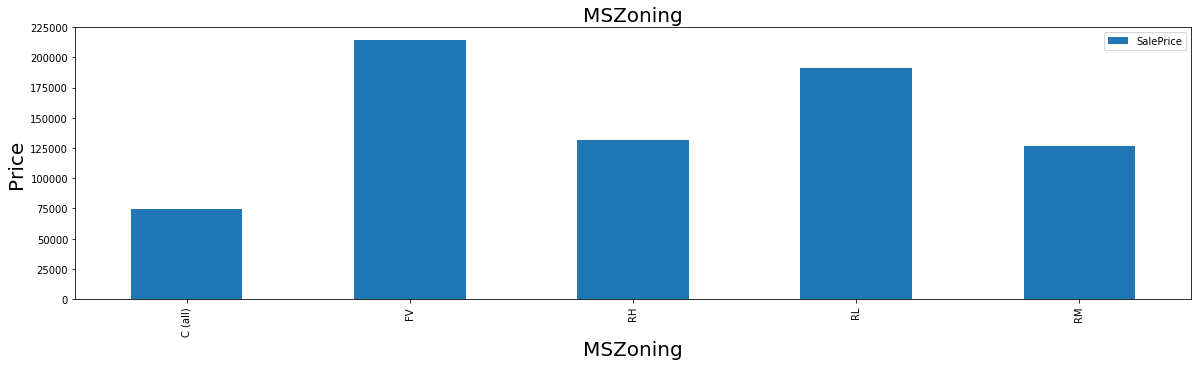

In [335]:
chart_bar('MSZoning')

### 2-1. Fill Null data

In [774]:
test[test['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,0.399376,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,0.771936,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,0.695034,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,0.771936,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


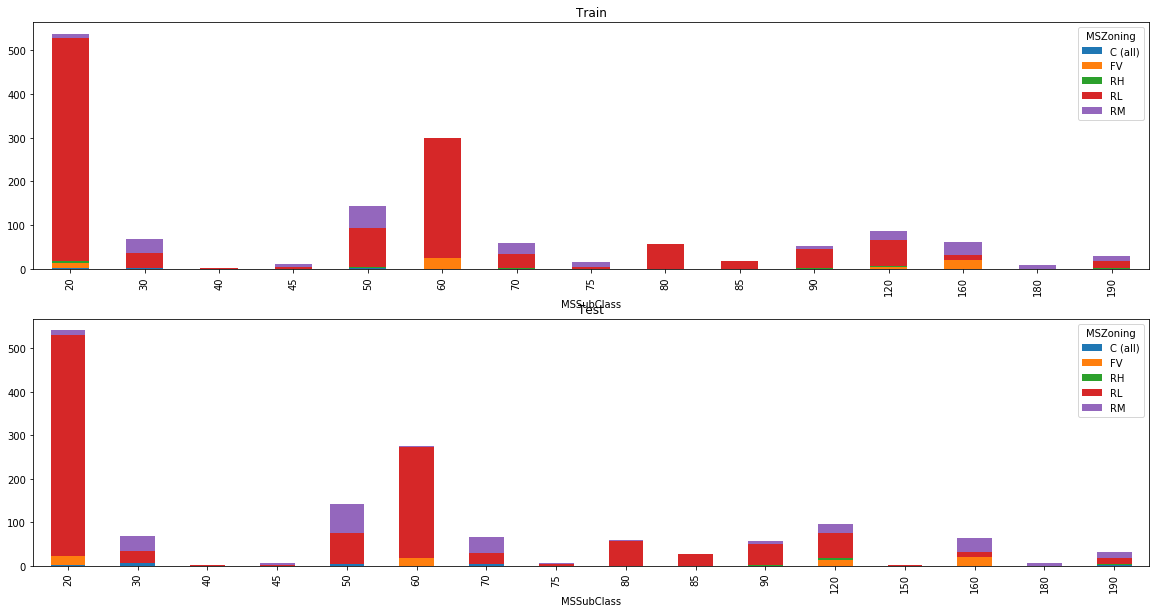

In [775]:
train_fill = pd.read_csv('train.csv')
test_fill = pd.read_csv('test.csv')
fig, axes = plt.subplots(2,1)
train_fill[['MSSubClass', 'MSZoning']].groupby(['MSSubClass', 'MSZoning']).size().unstack().plot(kind  = 'bar', figsize = (20, 10), stacked = True, ax = axes[0], title = 'Train')
test_fill[['MSSubClass', 'MSZoning']].groupby(['MSSubClass', 'MSZoning']).size().unstack().plot(kind  = 'bar', figsize = (20, 10), stacked = True, ax = axes[1], title = 'Test')

In [776]:
test['MSZoning'] = test['MSZoning'].fillna('RL')
test['MSZoning'].isnull().sum()

0

### 2-2. Mapping

In [777]:
mszoning_mapping = mapping('MSZoning')
for data in train_test_data:
    data['MSZoning'].replace(mszoning_mapping, inplace = True)

In [779]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,1.000000,0.796025,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,0.771936,0.796025,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,1.000000,0.796025,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,0.695034,0.796025,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,1.000000,0.796025,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [780]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0.771936,0.548278,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,0.771936,0.796025,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,1.000000,0.796025,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,1.000000,0.796025,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,0.836759,0.796025,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 3. LotFrontage
Linear feet of street connected to property

In [782]:
train_test_info('LotFrontage')

Information of LotFrontage 

Train
Number of null :  259
Number of value unique :  111
Kind of value unique :  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


Test
Number of null :  227
Number of value unique :  116
Kind of value unique :  [ 80.  81.  74.  78.  43.  75.  nan  63.  85.  70.  26.  21.  24. 102.
  94.  90.  79. 110. 105.  41. 100.  67.  60.  73.  92.  84.  39.  88.
  25.  30.  57.  68.  98. 120.  87. 119.  65.  56.  69.  50.  53.  52.
  51.  72.  86. 124.  44.  83

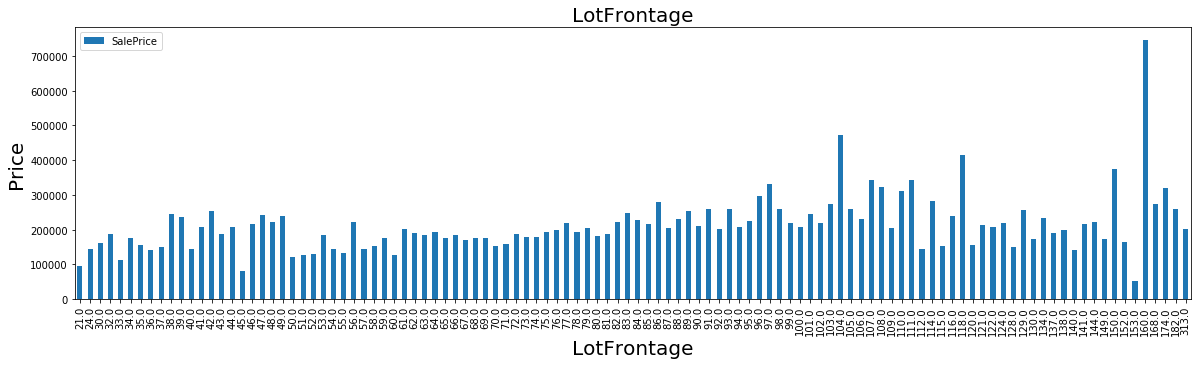

In [784]:
chart_bar('LotFrontage')

In [849]:
df = train[['SalePrice']].reindex(train['LotFrontage'])
df.plot.scatter(x = df.index, y = df['SalePrice'])

KeyError: "Float64Index([65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0,  nan, 51.0, 50.0,\n              ...\n              60.0, 78.0, 35.0, 90.0, 62.0, 62.0, 85.0, 66.0, 68.0, 75.0],\n             dtype='float64', name='LotFrontage', length=1460) not in index"

In [844]:
df = pd.DataFrame({'a' : [1,1,3,4,5], 'b' : [1,2,3,4,5]})
df.plot.scatter(x = df['a'], y = df['b'])

KeyError: '[1 1 3 4 5] not in index'

## References
- Feature description for Korean : https://blog.naver.com/kyungmin3737/221042939756